In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving urban.csv to urban.csv


In [ ]:
DataFram = pd.read_csv('urban.csv')

In [ ]:
DataFram.head(10)

,area,households,male,female,transgender,all genders,population 1998,sex ratio,average annual growth rate
0,PAKISTAN *,12192314,39149151,36428187,7651.0,75584989,45497046,107.47,2.70
1,KHYBER PAKHTUNKHWA,741014,2972367,2756577,690.0,5729634,3287210,107.83,2.96
2,FATA,16124,74452,67446,0.0,141898,85473,110.39,2.70
3,PUNJAB,6389733,20760984,19621729,4585.0,40387298,24130896,105.81,2.74
4,SINDH,4399782,13007937,11900295,2226.0,24910458,15695457,109.31,2.46
5,BALOCHISTAN,474725,1793554,1607253,69.0,3400876,1768830,111.59,3.49
6,ISLAMABAD,170936,539857,474887,81.0,1014825,529180,113.68,3.48
7,BANNU DIVISION,17300,73533,65847,5.0,139385,94554,111.67,2.06
8,BANNU DISTRICT,6258,27670,22294,1.0,49965,47676,124.11,0.25
9,LAKKI MARWAT DISTRICT,11042,45863,43553,4.0,89420,46878,105.30,3.45


In [ ]:
DataFram.describe()

,households,male,female,transgender,all genders,population 1998,sex ratio,average annual growth rate
count,1.510000e+02,1.510000e+02,1.510000e+02,146.000000,1.510000e+02,1.510000e+02,151.000000,151.000000
mean,3.205631e+05,1.029234e+06,9.580865e+05,208.506849,1.987522e+06,1.197258e+06,107.361457,2.741523
std,1.196935e+06,3.825898e+06,3.562234e+06,775.843979,7.388765e+06,4.440239e+06,5.236058,1.081597
min,6.910000e+02,1.702000e+03,1.704000e+03,0.000000,3.406000e+03,6.360000e+02,96.080000,0.250000
25%,2.221400e+04,7.360250e+04,6.923350e+04,7.500000,1.425960e+05,8.002600e+04,104.275000,2.145000
50%,5.900900e+04,1.966940e+05,1.864580e+05,38.500000,3.831690e+05,2.289690e+05,106.430000,2.530000
75%,1.722130e+05,5.463515e+05,5.197080e+05,114.000000,1.061840e+06,6.296005e+05,109.600000,3.200000
max,1.219231e+07,3.914915e+07,3.642819e+07,7651.000000,7.558499e+07,4.549705e+07,129.610000,9.210000


In [ ]:
DataFram.shape

(151, 9)

In [ ]:
DataFram.isnull().sum()

area                          0
households                    0
male                          0
female                        0
transgender                   5
all genders                   0
population 1998               0
sex ratio                     0
average annual growth rate    0
dtype: int64

In [ ]:
DataFram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   area                        151 non-null    object 
 1   households                  151 non-null    int64  
 2   male                        151 non-null    int64  
 3   female                      151 non-null    int64  
 4   transgender                 146 non-null    float64
 5   all genders                 151 non-null    int64  
 6   population 1998             151 non-null    int64  
 7   sex ratio                   151 non-null    float64
 8   average annual growth rate  151 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 10.7+ KB


In [ ]:
DataFram.dtypes

area                           object
households                      int64
male                            int64
female                          int64
transgender                   float64
all genders                     int64
population 1998                 int64
sex ratio                     float64
average annual growth rate    float64
dtype: object

In [ ]:
DataFram['households'].value_counts()

12192314    1
32641       1
51398       1
27712       1
31987       1
           ..
173490      1
2121484     1
1757691     1
140629      1
6868        1
Name: households, Length: 151, dtype: int64

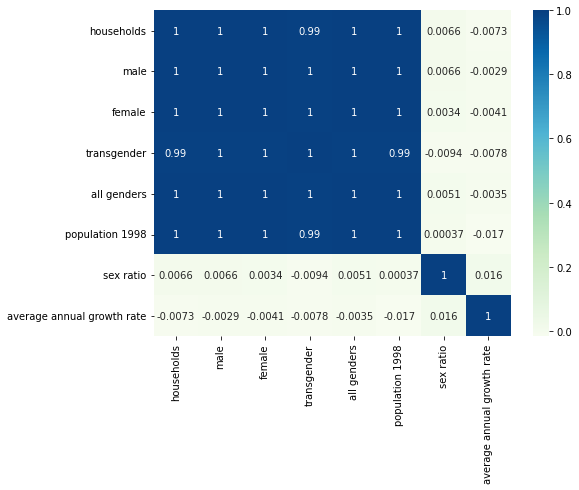

In [ ]:
correlation = DataFram.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation , cmap = 'GnBu' , annot = True)
plt.show()

In [ ]:
X = DataFram.iloc[:,[0,2,3,4,5,6,7,8]].values
Y = DataFram.iloc[:,[1]].values
print('The Shape of the X Matrix is : {}'.format(X.shape))
print('The Shape of the Y Matrix is : {}'.format(Y.shape))

The Shape of the X Matrix is : (151, 8)
The Shape of the Y Matrix is : (151, 1)


In [ ]:
imputer = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
X[:,[0,1,3,5,6]] = imputer.fit_transform(X[:,[0,1,3,5,6]])

In [ ]:
imputer_2 = SimpleImputer(missing_values = np.nan , strategy = 'mean')
X[:,[2,7]] = imputer_2.fit_transform(X[:,[2,7]])

In [ ]:
imputer_2 = SimpleImputer(missing_values = np.nan , strategy = 'mean')
X[:,[2,7]] = imputer_2.fit_transform(X[:,[2,7]])

In [ ]:
label_encoder = LabelEncoder()   

In [ ]:
Y = label_encoder.fit_transform(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
one_hot_encoder = OneHotEncoder()  
dummy_1 = one_hot_encoder.fit_transform(X[:,[0,1,3,5,6]]).toarray()


X = np.hstack((dummy_1 , X[:,[2,4,7]]))

print('The Shape of x is : {}'.format(X.shape))

X = X[:,0:50]

The Shape of x is : (151, 691)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split( X, Y , test_size = 0.2)

# Display the Shape of the Train & Test 
print('The Shape of X Train is : {}'.format(x_train.shape))
print('The Shape of X Test  is : {}'.format(x_test.shape))
print('The Shape of Y Train is : {}'.format(y_train.shape))
print('The Shape of Y Test  is : {}'.format(y_test.shape))

The Shape of X Train is : (120, 50)
The Shape of X Test  is : (31, 50)
The Shape of Y Train is : (120,)
The Shape of Y Test  is : (31,)


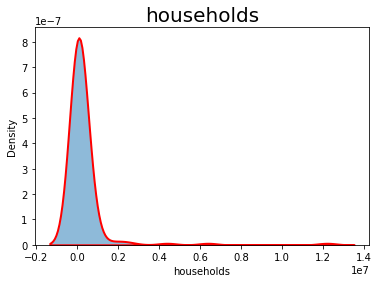

In [ ]:
sns.kdeplot(x = DataFram['households'] , shade = True , linewidth = 2 , alpha = 0.5 , edgecolor = 'red')
plt.title('households' , fontsize = 20)
plt.show()

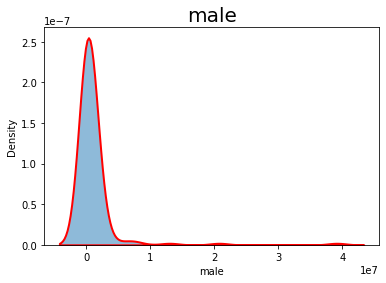

In [ ]:
sns.kdeplot(x = DataFram['male'] , shade = True , linewidth = 2 , alpha = 0.5 , edgecolor = 'red')
plt.title('male' , fontsize = 20)
plt.show()

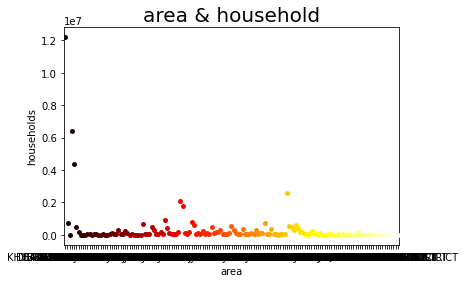

In [ ]:
 sns.stripplot(x = DataFram['area'] , y = DataFram['households'] , palette = 'hot')
 plt.title('area & household' , fontsize = 20)
 plt.show()

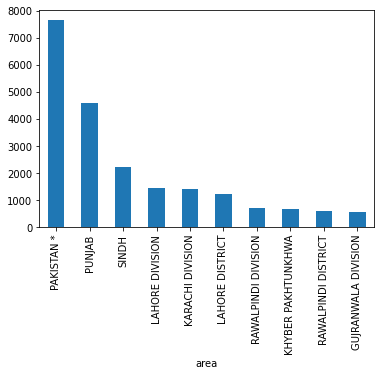

In [ ]:
DataFram.groupby('area')['transgender'].agg('sum').sort_values(ascending=False).head(10).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


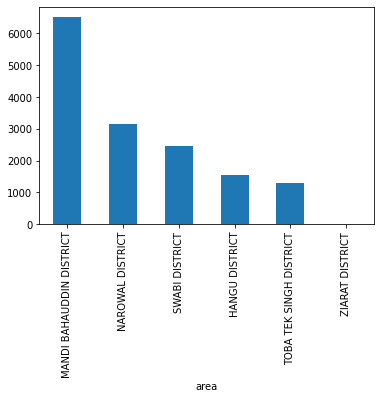

In [ ]:
DataFram =DataFram.loc[DataFram['female'] >= DataFram['male']]
DataFram['no of women greater']=DataFram['female'] - DataFram['male']
DataFram.groupby('area')['no of women greater'].agg('sum').sort_values(ascending=False).head(10).plot(kind='bar')

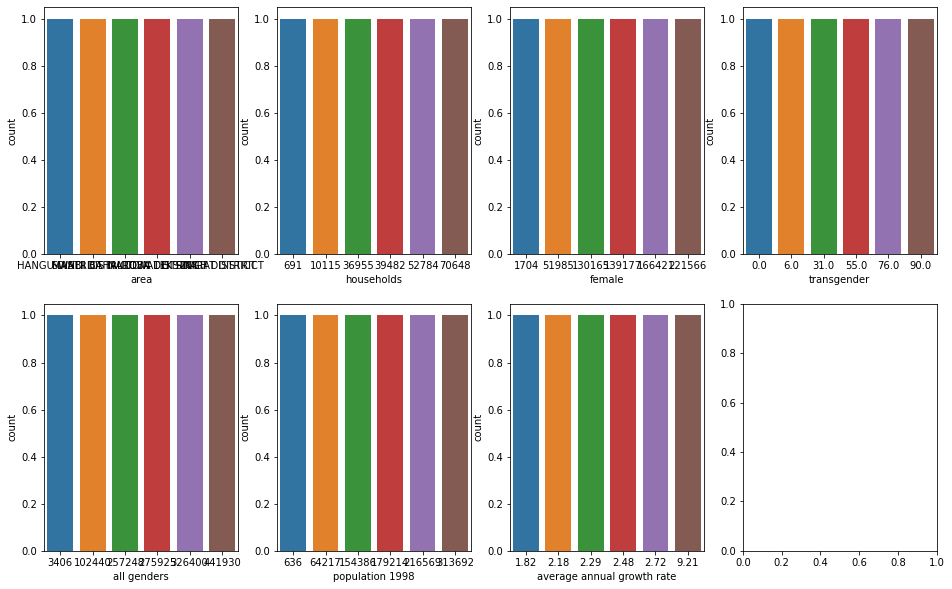

In [ ]:
# Univariate Analysis:
# categorical attributes visualization
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='area', data = DataFram, ax=ax[0][0])
sns.countplot(x='households', data =  DataFram, ax=ax[0][1])
sns.countplot(x='female', data =  DataFram, ax=ax[0][2])
sns.countplot(x='transgender', data =  DataFram, ax=ax[0][3])
sns.countplot(x='all genders', data =  DataFram, ax=ax[1][0])
sns.countplot(x='population 1998', data =  DataFram, ax=ax[1][1])
sns.countplot(x='average annual growth rate', data =  DataFram, ax=ax[1][2])

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y,cv=10)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [ ]:
# specify input and output attributes
X = DataFram.drop(columns=['area'], axis=1)
y = DataFram['area']

In [ ]:
from sklearn.linear_model import LogisticRegression

LIR = LogisticRegression()

 
LIR.fit(x_train , y_train)


prediction_lir = LIR.predict(x_test)
prediction_lir

array([22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22])

In [ ]:
accuracy_score_lir = accuracy_score(prediction_lir , y_test)
print(accuracy_score_lir)

0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
 
DTC.fit(x_train , y_train)


prediction_dtc = DTC.predict(x_test)
prediction_dtc

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
accuracy_score_dtc = accuracy_score(prediction_dtc , y_test)
print(accuracy_score_dtc)

0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
 
RFC.fit(x_train , y_train)


prediction_rfc = RFC.predict(x_test)
prediction_rfc

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [ ]:
accuracy_score_rfc = accuracy_score(prediction_rfc , y_test)
print(accuracy_score_rfc)

0.0
